# Lab 8: Define and Solve an ML Problem of Your Choosing

In [35]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [36]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the AirBnb NYC "listings" data set. My model will be predicting how likely an AirBnb listing in NYC will be available for booking in the next 30 days. The label is the column 'availability_30'. This is a supervised learning problem because I am using labeled data and since 'availability_30' contains numeric value, this is a regression problem. The features will be all of the remaining columns in the dataset, as of right now. If an AirBnb with high reviews is not booked out, AirBnb can advertise this listing to customers. Additionally, hosts can plan for periods of high or low demand. For example, in a beach town, it is likely listings will not be booked out in colder months. Finally, if AirBnbs are not being booked, pricing can potentially be adjusted to maximize profits.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [37]:
print(df.columns)

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [38]:
# Display the first 15 unique values
first_15 = df['availability_30'].unique()
print(first_15[:15])

[ 3  1  0  2  6 30  5 12 29  9  7 27 19 10 22]


In [39]:
# Create a list of feature names by excluding the 'availability_30' column
feature_names = list(df.columns)
feature_names.remove('availability_30')

print(feature_names)

['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_list

In [40]:
# Check for missing values in the dataset
missing_values = df.isnull()

# Sum up the resulting boolean values by columns
nan_count = missing_values.sum()

# Check if the number of missing values is not zero
nan_detected = nan_count > 0
print(nan_detected)

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [41]:
# Get the data types of each column
column_dtypes = df.dtypes

# Contains True if the type of the column is either int64 or float64
is_int_or_float = (column_dtypes == 'int64') | (column_dtypes == 'float64')
print(is_int_or_float)

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                              True
host_total_listings_count                        True
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                        

In [42]:
to_impute = nan_detected & is_int_or_float
df.columns[to_impute]
to_impute_selected = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']

In [43]:
# Create dummy variables indicating missingness for each selected column
for column in to_impute_selected:
    df[column + '_na'] = df[column].isnull()

# Fill missing values with the mean of each column listed in to_impute_selected
for column in to_impute_selected:
    df[column].fillna(df[column].mean(), inplace=True)

In [44]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


In [45]:
# Find columns with 'object' data type, which are strings
object_columns = df.select_dtypes(include=['object'])

# Inspect the number of unique values for each column
for column in object_columns.columns:
    unique_values_count = object_columns[column].nunique()
    print("Column '{}': {} unique values".format(column, unique_values_count))

Column 'name': 27386 unique values
Column 'description': 25952 unique values
Column 'neighborhood_overview': 15800 unique values
Column 'host_name': 7566 unique values
Column 'host_location': 1364 unique values
Column 'host_about': 11962 unique values
Column 'neighbourhood_group_cleansed': 5 unique values
Column 'room_type': 4 unique values
Column 'amenities': 25020 unique values


In [46]:
# List of features for one-hot encoding
features_for_encoding = ['neighbourhood_group_cleansed', 'room_type']

# Inspect the unique values for each feature
for feature in features_for_encoding:
    unique_values = df[feature].unique()
    print("Feature '{}': {} unique values".format(feature, unique_values))

Feature 'neighbourhood_group_cleansed': ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx'] unique values
Feature 'room_type': ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room'] unique values


In [47]:
# One-hot encode the 'neighbourhood_group_cleansed' feature
df_neighbourhood_group_cleansed = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')

# Concatenate the new one-hot encoded columns with the original DataFrame and drop the original column
df = pd.concat([df, df_neighbourhood_group_cleansed], axis=1)
df.drop(columns=['neighbourhood_group_cleansed'], inplace=True)

# One-hot encode the 'room_type' feature
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type')

# Concatenate the new one-hot encoded columns with the original DataFrame and drop the original column
df = pd.concat([df, df_room_type], axis=1)
df.drop(columns=['room_type'], inplace=True)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,beds_na,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8.0,...,False,0,0,1,0,0,1,0,0,0
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1.0,...,False,0,1,0,0,0,1,0,0,0
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1.0,...,False,0,1,0,0,0,1,0,0,0
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1.0,...,False,0,0,1,0,0,0,0,1,0
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1.0,...,False,0,0,1,0,0,0,0,1,0


0     13612
3      1292
30     1137
1      1132
2       982
4       911
5       706
6       633
7       593
29      587
8       553
9       492
11      456
10      430
12      413
13      370
15      370
14      358
28      326
17      297
16      292
18      245
20      244
19      243
23      243
21      240
27      222
22      184
24      169
25      151
26      139
Name: availability_30, dtype: int64


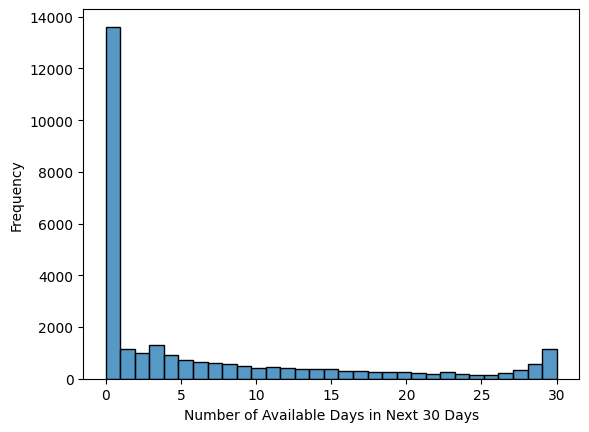

In [48]:
# Checking for class imbalance
print(df['availability_30'].value_counts())

plt.figure()
sns.histplot(df['availability_30'], bins=31, kde=False)
plt.xlabel('Number of Available Days in Next 30 Days')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Since this is a regression problem, I am going to leave the data as it is.

In [49]:
corr_matrix = round(df.corr(),5)

print(corr_matrix)

                                              host_response_rate  \
host_response_rate                                       1.00000   
host_acceptance_rate                                     0.42738   
host_is_superhost                                            NaN   
host_listings_count                                      0.04103   
host_total_listings_count                                0.04103   
host_has_profile_pic                                         NaN   
host_identity_verified                                       NaN   
accommodates                                             0.02200   
bathrooms                                                0.01969   
bedrooms                                                 0.01447   
beds                                                     0.02034   
price                                                    0.00542   
minimum_nights                                          -0.09917   
maximum_nights                                  

In [50]:
# Extract the availability_30 column of the correlation matrix
corrs = corr_matrix['availability_30']

# Sort the values of the series corrs in descending order
corrs_sorted = corrs.sort_values(ascending=False)

print(corrs_sorted)

availability_30                                 1.00000
availability_60                                 0.87248
availability_90                                 0.78647
availability_365                                0.52729
price                                           0.14689
has_availability                                0.13374
neighbourhood_group_cleansed_Queens             0.12792
room_type_Private room                          0.08748
neighbourhood_group_cleansed_Bronx              0.07910
calculated_host_listings_count_shared_rooms     0.07733
number_of_reviews_l30d                          0.07369
reviews_per_month                               0.07224
room_type_Hotel room                            0.07000
beds_na                                         0.06887
instant_bookable                                0.06526
number_of_reviews_ltm                           0.06401
room_type_Shared room                           0.06058
calculated_host_listings_count                  

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I do have a new feature list that only includes the features with a positive correlation with 'availability_30'. I dropped 31 features. I already performed feature engineering and handled missing values as well as finding the correlation between all features and 'availability_30'. I will create training and test sets out of the labeled examples with the 'test_size' being 15% of the data at first. Then I will create a LinearRegression model object, and then fit the model to the training data. To evaluate the model, I will compute the root mean square error on the test set. RMSE finds the difference between the predicted values and the actual values. Last, I will use the coefficient of determination, R^2. R^2 is a measure of the proportion of variability in the prediction that the model was able to make using the input data. An R^2 value of 1 is perfect and 0 means no explanatory value.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [52]:
# Extracting feature columns X
X = df.drop(columns=['name', 'description', 'amenities', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'availability_30', 'maximum_nights', 'bedrooms_na', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'neighbourhood_group_cleansed_Manhattan', 'host_acceptance_rate', 'review_scores_cleanliness', 'neighbourhood_group_cleansed_Brooklyn', 'room_type_Entire home/apt', 'review_scores_location', 'n_host_verifications', 'review_scores_checkin', 'review_scores_rating', 'review_scores_communication', 'host_response_rate', 'review_scores_value', 'host_acceptance_rate_na', 'host_response_rate_na', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'])

# Extracting label column y ('availability_30')
y = df['availability_30']

In [53]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:30
['host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'has_availability', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'beds_na', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Queens', 'neighbourhood_group_cleansed_Staten Island', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

In [55]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [56]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   3.81
 R^2 =   0.84
